## Setup

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import torch
from sklearn.model_selection import cross_val_predict, cross_val_score, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from torch import nn
from torch.utils.data import DataLoader, TensorDataset

from tabularpytorchers.reg import BaseNNRegressor, NNRegressorEstimator
from tabularpytorchers.viz import ForwardTracker

## Basic EDA

In [ ]:
data = pd.read_csv("../.data/boston.csv").drop("Unnamed: 0", axis=1)

In [ ]:
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [ ]:
data.isnull().mean()

crim       0.0
zn         0.0
indus      0.0
chas       0.0
nox        0.0
rm         0.0
age        0.0
dis        0.0
rad        0.0
tax        0.0
ptratio    0.0
black      0.0
lstat      0.0
medv       0.0
dtype: float64

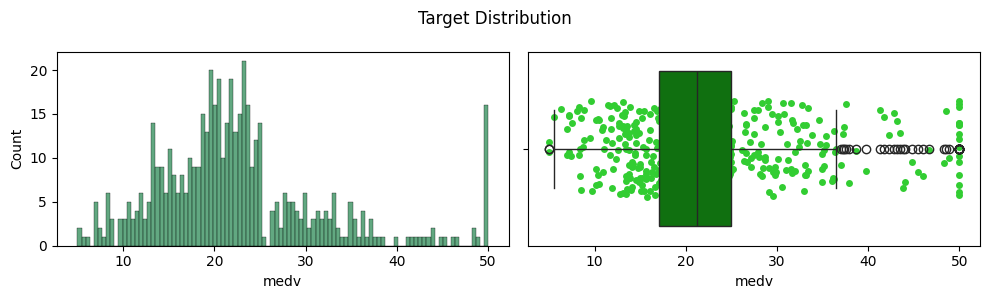

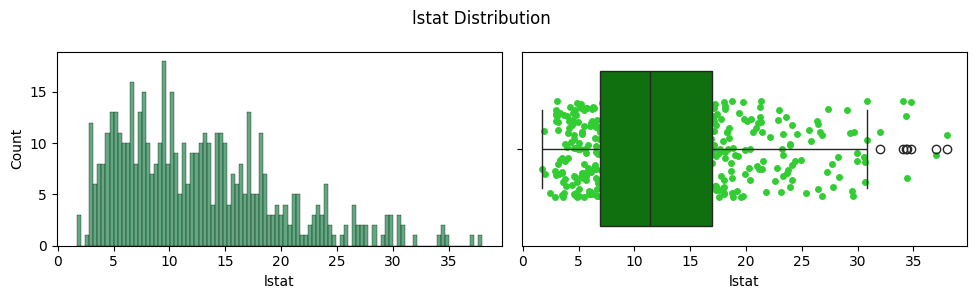

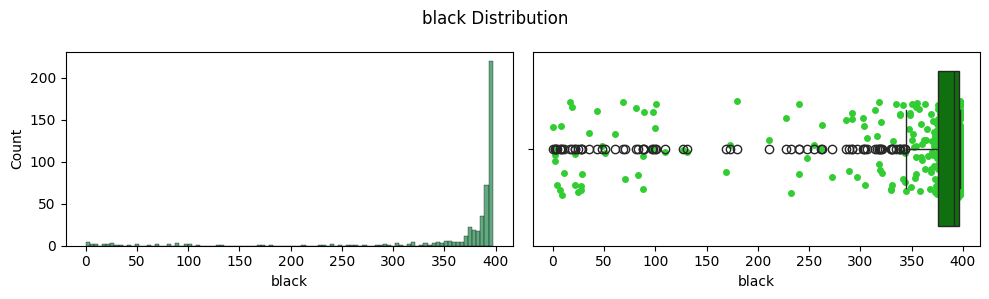

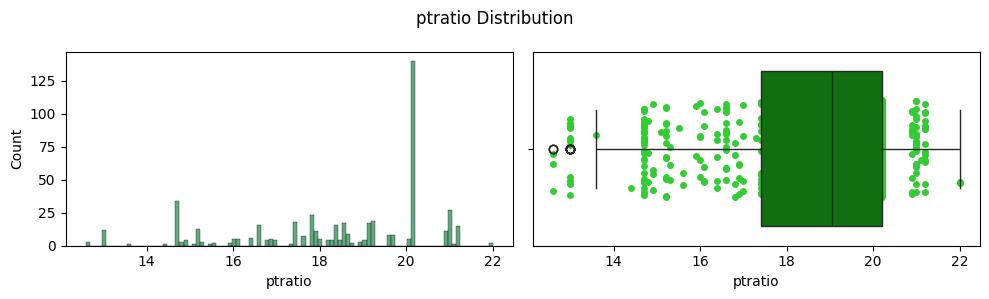

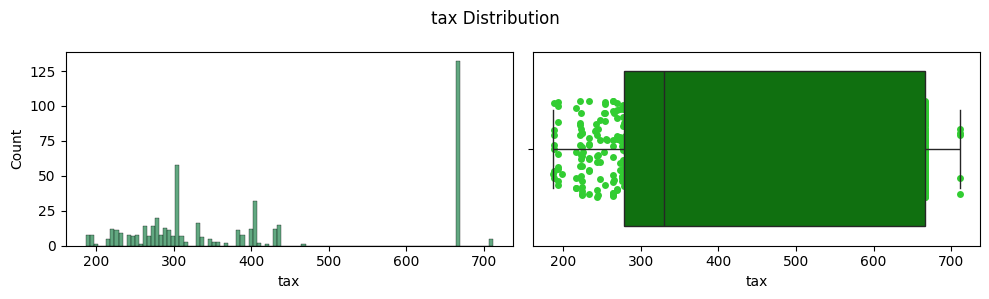

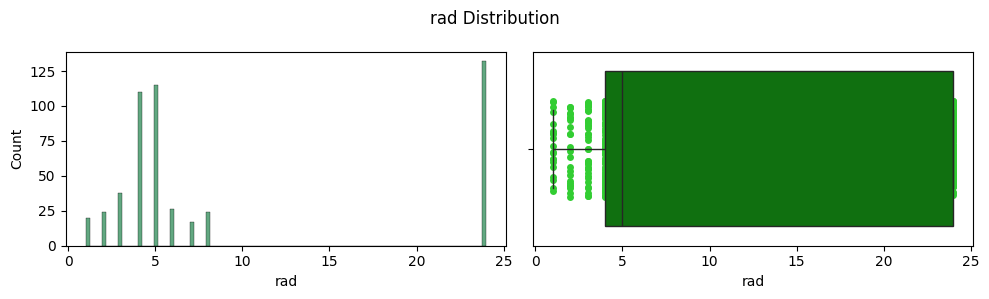

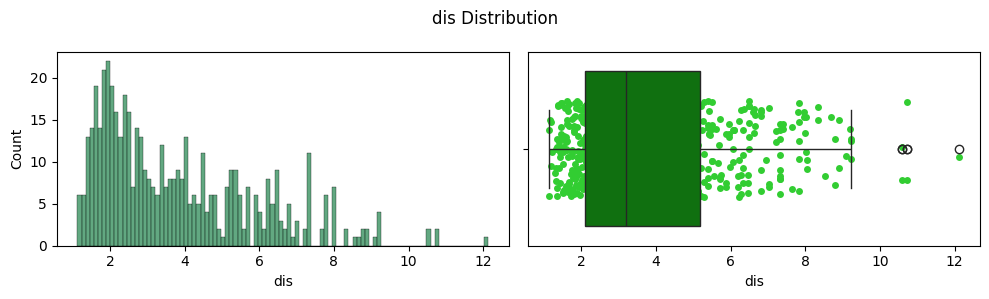

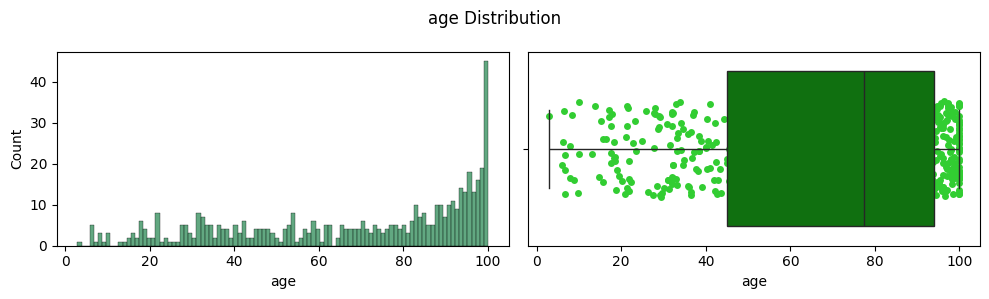

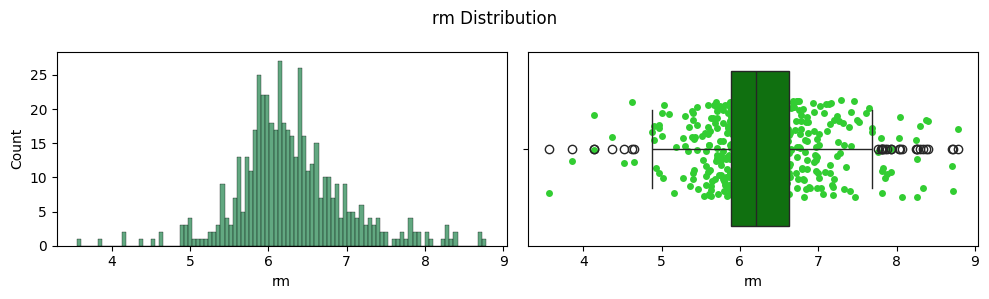

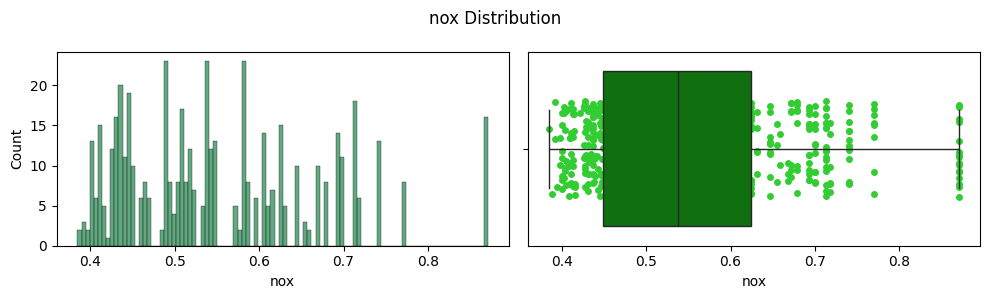

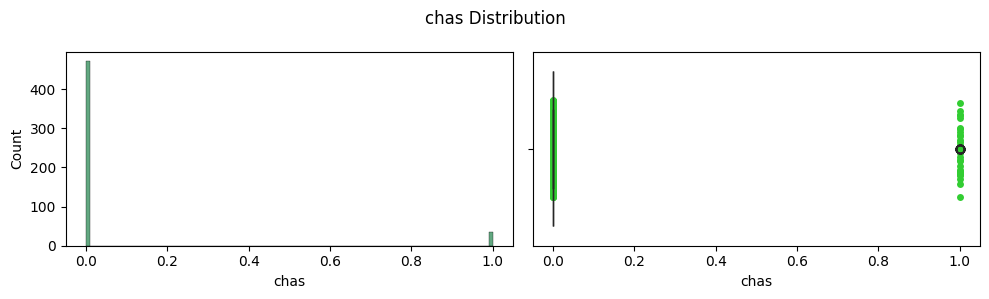

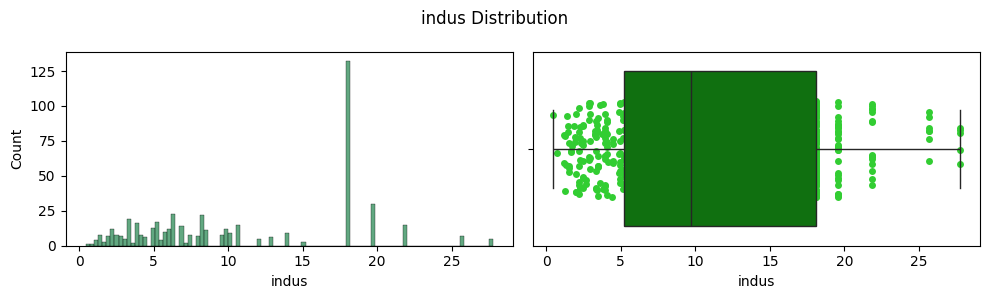

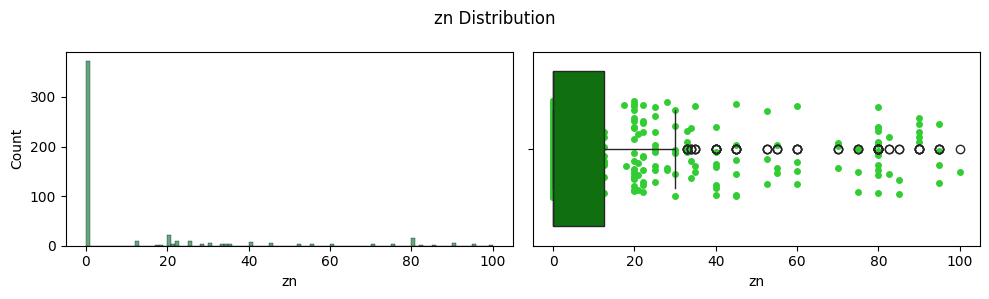

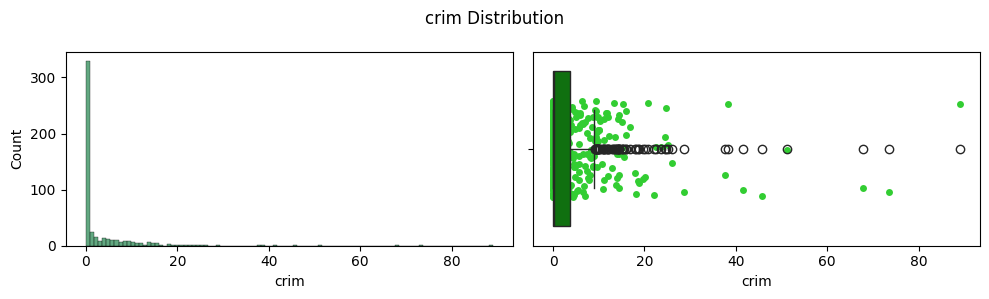

In [ ]:
for c in data.columns[::-1]:
    fig, ax = plt.subplots(ncols=2, figsize=(10, 3))
    sns.histplot(data[c], bins=100, color="seagreen", ax=ax[0])
    sns.stripplot(data[c], orient="h", jitter=0.25, zorder=1, color="limegreen", ax=ax[1])
    sns.boxplot(data[c], color="green", orient="h", ax=ax[1])
    c = "Target" if c == "medv" else c
    fig.suptitle(f"{c} Distribution")
    fig.tight_layout()

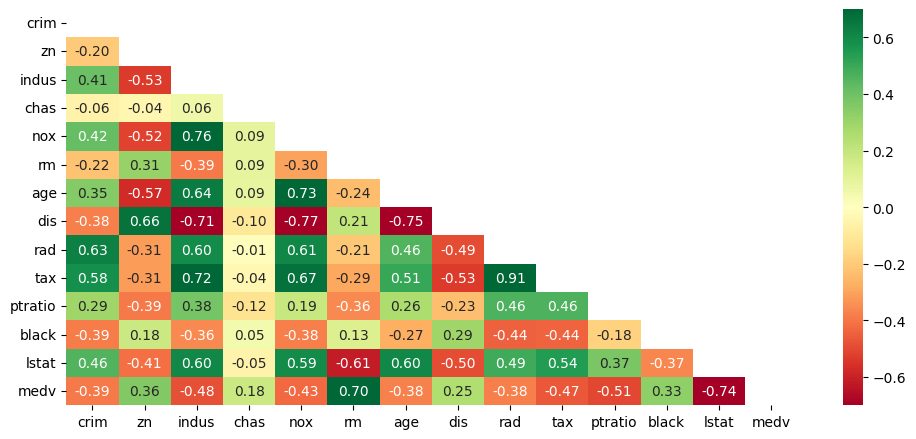

In [ ]:
fig, ax = plt.subplots(figsize=(10, 4.5))
sns.heatmap(
    data.corr(),
    annot=True,
    cmap="RdYlGn",
    center=0,
    vmax=0.7,
    vmin=-0.7,
    fmt=".2f",
    mask=np.triu(np.ones_like(data.corr(), dtype=bool)),
    ax=ax,
)
fig.tight_layout()

## Modeling and sklearn compatibility

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop("medv", axis=1), data["medv"], test_size=0.2
)

In [ ]:
base_model = BaseNNRegressor(input_size=X_train.shape[1], layers=[64, 32], output_size=1)
estimator = NNRegressorEstimator(model=base_model)

In [ ]:
pipe = Pipeline([("scaler", StandardScaler()), ("nn_regressor", estimator)])

pipe.fit(X_train, y_train)

Epoch: 0/100 - Train Loss 635.5443115234375 - Val Loss: 466.0903625488281
Epoch: 1/100 - Train Loss 629.678955078125 - Val Loss: 461.10498046875
Epoch: 2/100 - Train Loss 622.9541015625 - Val Loss: 455.5689697265625
Epoch: 3/100 - Train Loss 614.7139282226562 - Val Loss: 448.9249572753906
Epoch: 4/100 - Train Loss 604.1137084960938 - Val Loss: 440.6096496582031
Epoch: 5/100 - Train Loss 590.4315185546875 - Val Loss: 430.02099609375
Epoch: 6/100 - Train Loss 572.8646850585938 - Val Loss: 416.5917053222656
Epoch: 7/100 - Train Loss 550.5773315429688 - Val Loss: 399.73956298828125
Epoch: 8/100 - Train Loss 522.7249755859375 - Val Loss: 378.98193359375
Epoch: 9/100 - Train Loss 488.80621337890625 - Val Loss: 354.07318115234375
Epoch: 10/100 - Train Loss 448.44586181640625 - Val Loss: 324.8743896484375
Epoch: 11/100 - Train Loss 402.3185729980469 - Val Loss: 291.818603515625
Epoch: 12/100 - Train Loss 351.192138671875 - Val Loss: 255.63583374023438
Epoch: 13/100 - Train Loss 297.55114746093

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('scaler', ...), ('nn_regressor', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"copy copy: bool, default=TrueIf False, try to avoid a copy and do inplace scaling instead.This is not guaranteed to always work inplace; e.g. if the data isnot a NumPy array or scipy.sparse CSR matrix, a copy may still bereturned.",True
,"with_mean with_mean: bool, default=TrueIf True, center the data before scaling.This does not work (and will raise an exception) when attempted onsparse matrices, because centering them entails building a densematrix which in common use cases is likely to be too large to fit inmemory.",True
,"with_std with_std: bool, default=TrueIf True, scale the data to unit variance (or equivalently,unit standard deviation).",True
,model,"BaseNNRegress..., bias=True) )"
,loss,'mse'
,optimizer,'adam'
,lr,0.001


In [ ]:
pipe.predict(X_test)

array([25.283312 , 22.997993 , 22.098211 , 13.505447 , 34.17347  ,
        5.6504025, 15.504992 , 17.210989 ,  6.5336185, 23.433397 ,
       14.815928 , 17.521938 , 36.618973 , 25.83403  , 32.3264   ,
       28.823038 , 28.64954  , 43.75636  ,  9.980159 , 18.135172 ,
       28.535103 , 13.007201 , 21.12645  , 31.557192 , 21.689705 ,
       19.047434 , 23.53714  , 25.118233 , 21.698214 , 20.443289 ,
       16.373232 , 28.112133 , 16.02037  , 27.476595 , 20.445852 ,
       18.90693  , 36.89218  , 24.907656 , 35.122295 , 29.44785  ,
       13.058477 , 24.631533 , 27.162054 , 15.780143 , 29.705408 ,
       21.153528 , 16.836248 , 25.893026 , 25.618662 , 22.091991 ,
       16.516613 , 15.987685 , 14.80577  , 27.180414 , 19.104418 ,
       21.859692 , 24.406626 , 17.785835 , 14.38821  , 15.028773 ,
       13.492834 , 21.31313  , 23.065775 , 25.748589 , 27.223633 ,
       25.263968 , 23.106447 , 18.985907 , 24.180136 , 26.591024 ,
        9.667613 , 32.25737  , 16.434198 , 27.307186 ,  9.9589

In [ ]:
def plot_losses(train_losses, val_losses):
    fig, ax = plt.subplots(figsize=(10, 4))
    ax.plot(train_losses, label="Train Loss")
    ax.plot(val_losses, label="Val Loss")
    ax.set_title("Losses")
    ax.set_xlabel("Epochs")
    ax.set_ylabel("Loss")
    ax.grid(True)
    ax.legend()
    fig.tight_layout()

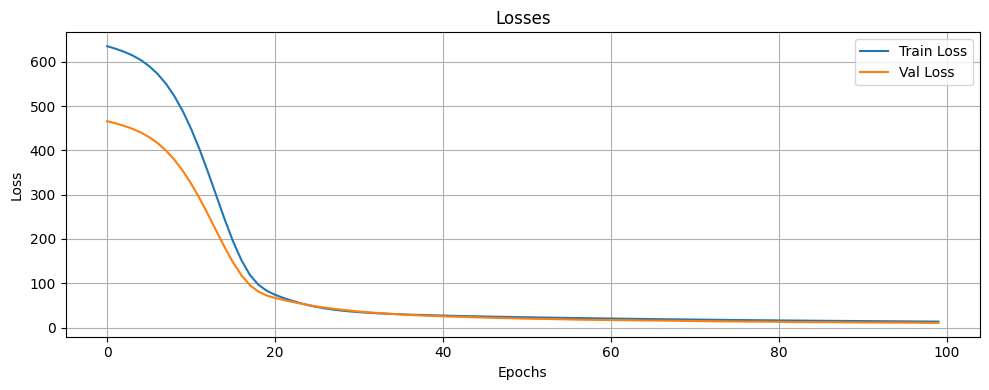

In [ ]:
plot_losses(
    pipe.named_steps["nn_regressor"].train_losses_, pipe.named_steps["nn_regressor"].val_losses_
)

In [ ]:
# set verbose to False
pipe.named_steps["nn_regressor"].verbose = False

In [ ]:
# cross_val_score
cross_val_score(pipe, X_train, y_train, cv=5, scoring="neg_mean_squared_error")

array([ -9.21089458,  -7.01130553, -26.31328734, -12.95049887,
        -8.09386614])

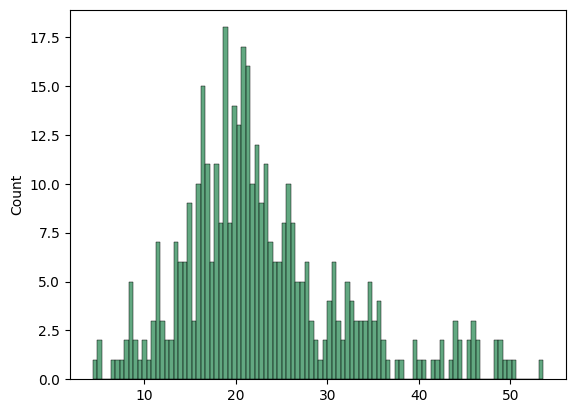

In [ ]:
# cross_val_predict
sns.histplot(cross_val_predict(pipe, X_train, y_train, cv=5), bins=100, color="seagreen")
plt.show()

## Model Inspection

In [ ]:
class BostonRegressor(nn.Module, ForwardTracker):
    def __init__(self, input_size, layers, output_size=1):
        nn.Module.__init__(self)
        self.input_size = input_size
        self.layers = layers
        self.output_size = output_size
        for i in range(len(layers)):
            in_features = input_size if i == 0 else layers[i - 1]
            out_features = layers[i]
            setattr(self, f"fc{i}", nn.Linear(in_features, out_features))
        self.final_linear = nn.Linear(layers[-1], output_size)

    def forward(self, x):
        for i in range(len(self.layers)):
            x = getattr(self, f"fc{i}")(x)
            x = nn.ReLU()(x)
        x = self.final_linear(x)
        return x

In [ ]:
def train_loop(model, train_set, val_set, loss_fn=None, epochs=100, verbose=True):
    if loss_fn is None:
        loss_fn = nn.MSELoss()
    X_train = torch.tensor(train_set[0], dtype=torch.float32)
    y_train = torch.tensor(train_set[1], dtype=torch.float32)
    X_val = torch.tensor(val_set[0], dtype=torch.float32)
    y_val = torch.tensor(val_set[1], dtype=torch.float32)

    model.train()
    optimizer = torch.optim.Adam(model.parameters())
    train_losses, val_losses = [], []
    dataloader = DataLoader(TensorDataset(X_train, y_train), batch_size=64, shuffle=True)

    for epoch in range(epochs):
        for batch_X, batch_y in dataloader:
            optimizer.zero_grad()
            preds = model(batch_X)
            loss = loss_fn(preds, batch_y)
            loss.backward()
            optimizer.step()

        with torch.no_grad():
            train_preds, val_preds = model(X_train), model(X_val)
            train_loss, val_loss = (
                loss_fn(train_preds, y_train).item(),
                loss_fn(val_preds, y_val).item(),
            )
            train_losses.append(train_loss)
            val_losses.append(val_loss)

        if verbose:
            print(f"Epoch: {epoch}/{epochs} - Train Loss {train_loss} - Val Loss: {val_loss}")

    return train_losses, val_losses, model

In [ ]:
scaler = StandardScaler()
X_train_transformed = scaler.fit_transform(X_train)
X_test_transformed = scaler.transform(X_test)

In [ ]:
_, _, model = train_loop(
    model=BostonRegressor(input_size=X_train_transformed.shape[1], layers=[32, 32, 16]),
    train_set=(X_train_transformed, y_train.values),
    val_set=(X_test_transformed, y_test.values),
    epochs=100,
    verbose=True,
)

/Users/soufiane/Desktop/perso/tabularpytorchers/.venv/lib/python3.12/site-packages/torch/nn/modules/loss.py:634: UserWarning: Using a target size (torch.Size([64])) that is different to the input size (torch.Size([64, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/Users/soufiane/Desktop/perso/tabularpytorchers/.venv/lib/python3.12/site-packages/torch/nn/modules/loss.py:634: UserWarning: Using a target size (torch.Size([20])) that is different to the input size (torch.Size([20, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/Users/soufiane/Desktop/perso/tabularpytorchers/.venv/lib/python3.12/site-packages/torch/nn/modules/loss.py:634: UserWarning: Using a target size (torch.Size([404])) that is different to the input size (torch.Size([404, 1]))

Epoch: 0/100 - Train Loss 605.8801879882812 - Val Loss: 492.239990234375
Epoch: 1/100 - Train Loss 603.2161254882812 - Val Loss: 489.76629638671875
Epoch: 2/100 - Train Loss 599.4805297851562 - Val Loss: 486.3245849609375
Epoch: 3/100 - Train Loss 593.940673828125 - Val Loss: 481.2521057128906
Epoch: 4/100 - Train Loss 585.5838623046875 - Val Loss: 473.6292724609375
Epoch: 5/100 - Train Loss 572.9528198242188 - Val Loss: 462.1165771484375
Epoch: 6/100 - Train Loss 554.21728515625 - Val Loss: 445.09332275390625
Epoch: 7/100 - Train Loss 527.2530517578125 - Val Loss: 420.63623046875
Epoch: 8/100 - Train Loss 490.05804443359375 - Val Loss: 387.1476745605469
Epoch: 9/100 - Train Loss 441.05902099609375 - Val Loss: 343.256591796875
Epoch: 10/100 - Train Loss 380.039794921875 - Val Loss: 289.3058166503906
Epoch: 11/100 - Train Loss 310.2970886230469 - Val Loss: 228.6894989013672
Epoch: 12/100 - Train Loss 239.17503356933594 - Val Loss: 168.88453674316406
Epoch: 13/100 - Train Loss 179.737396

/Users/soufiane/Desktop/perso/tabularpytorchers/src/tabularpytorchers/viz.py:62: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


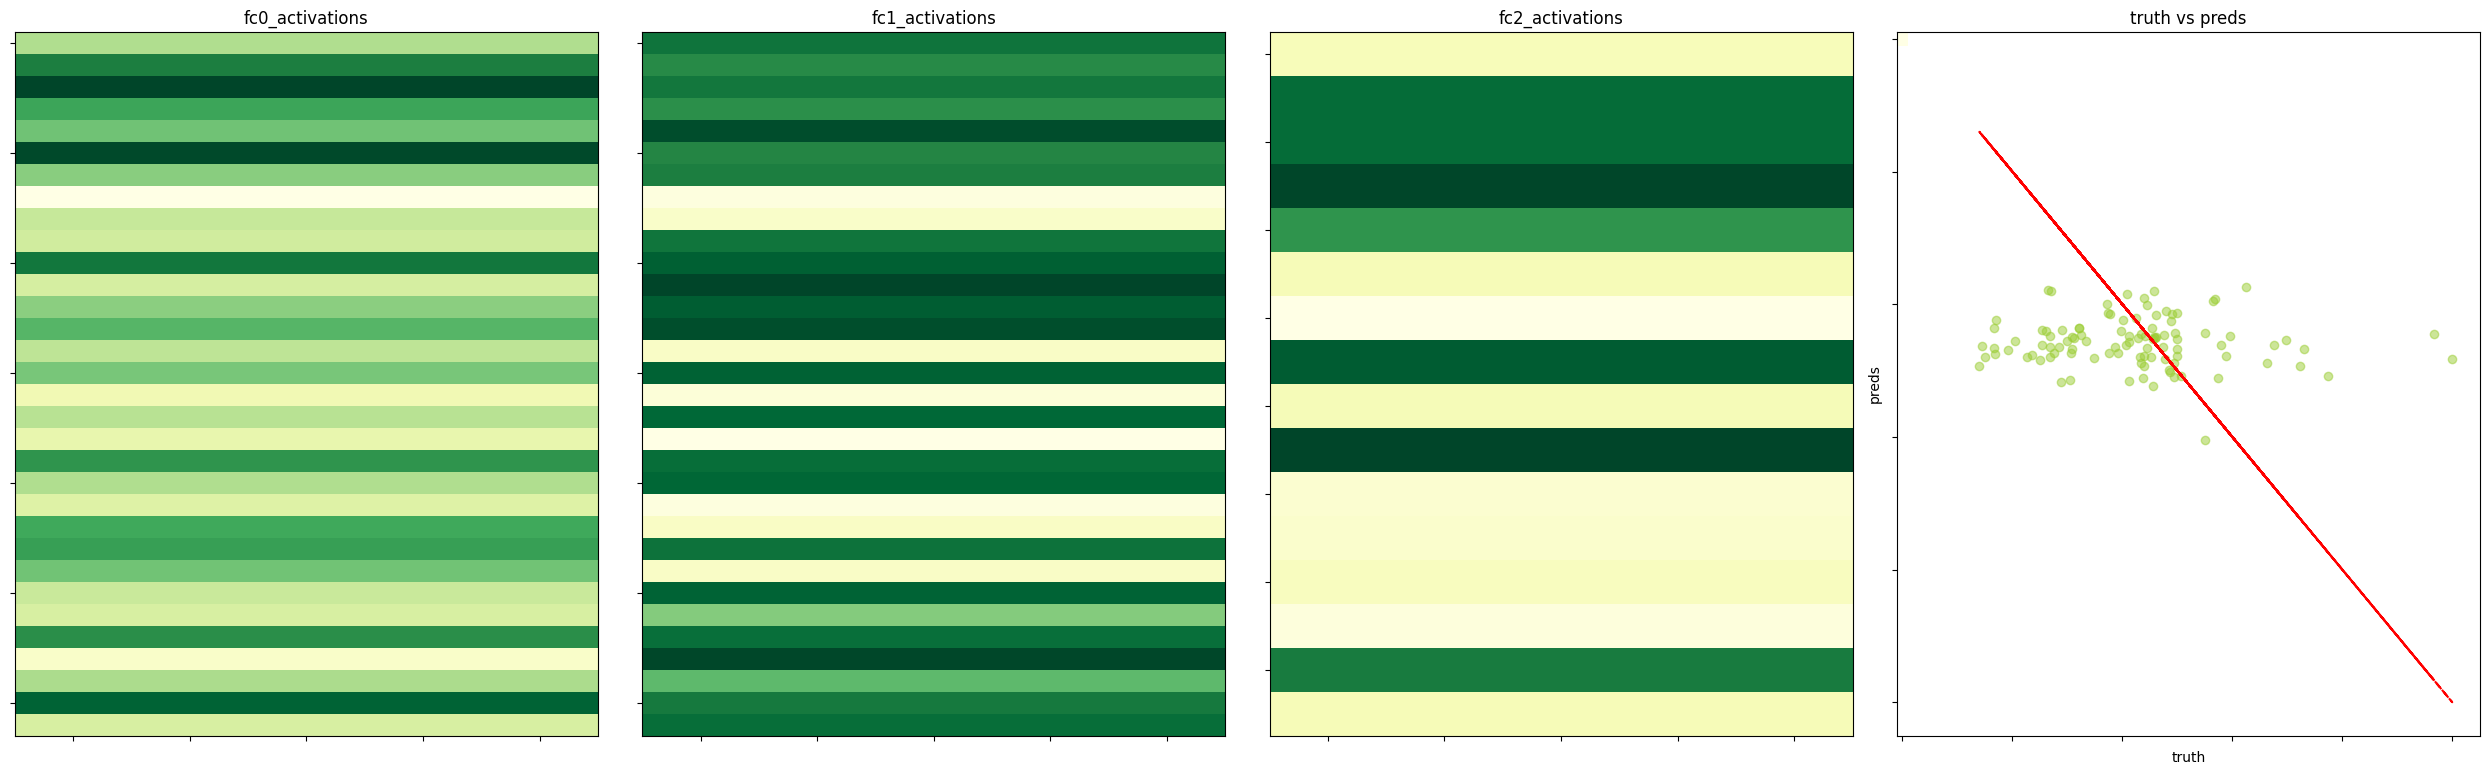

In [ ]:
model.plot_activations(
    X=torch.tensor(X_test_transformed, dtype=torch.float32),
    y=torch.tensor(y_test.values, dtype=torch.float32),
)

/Users/soufiane/Desktop/perso/tabularpytorchers/src/tabularpytorchers/viz.py:62: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


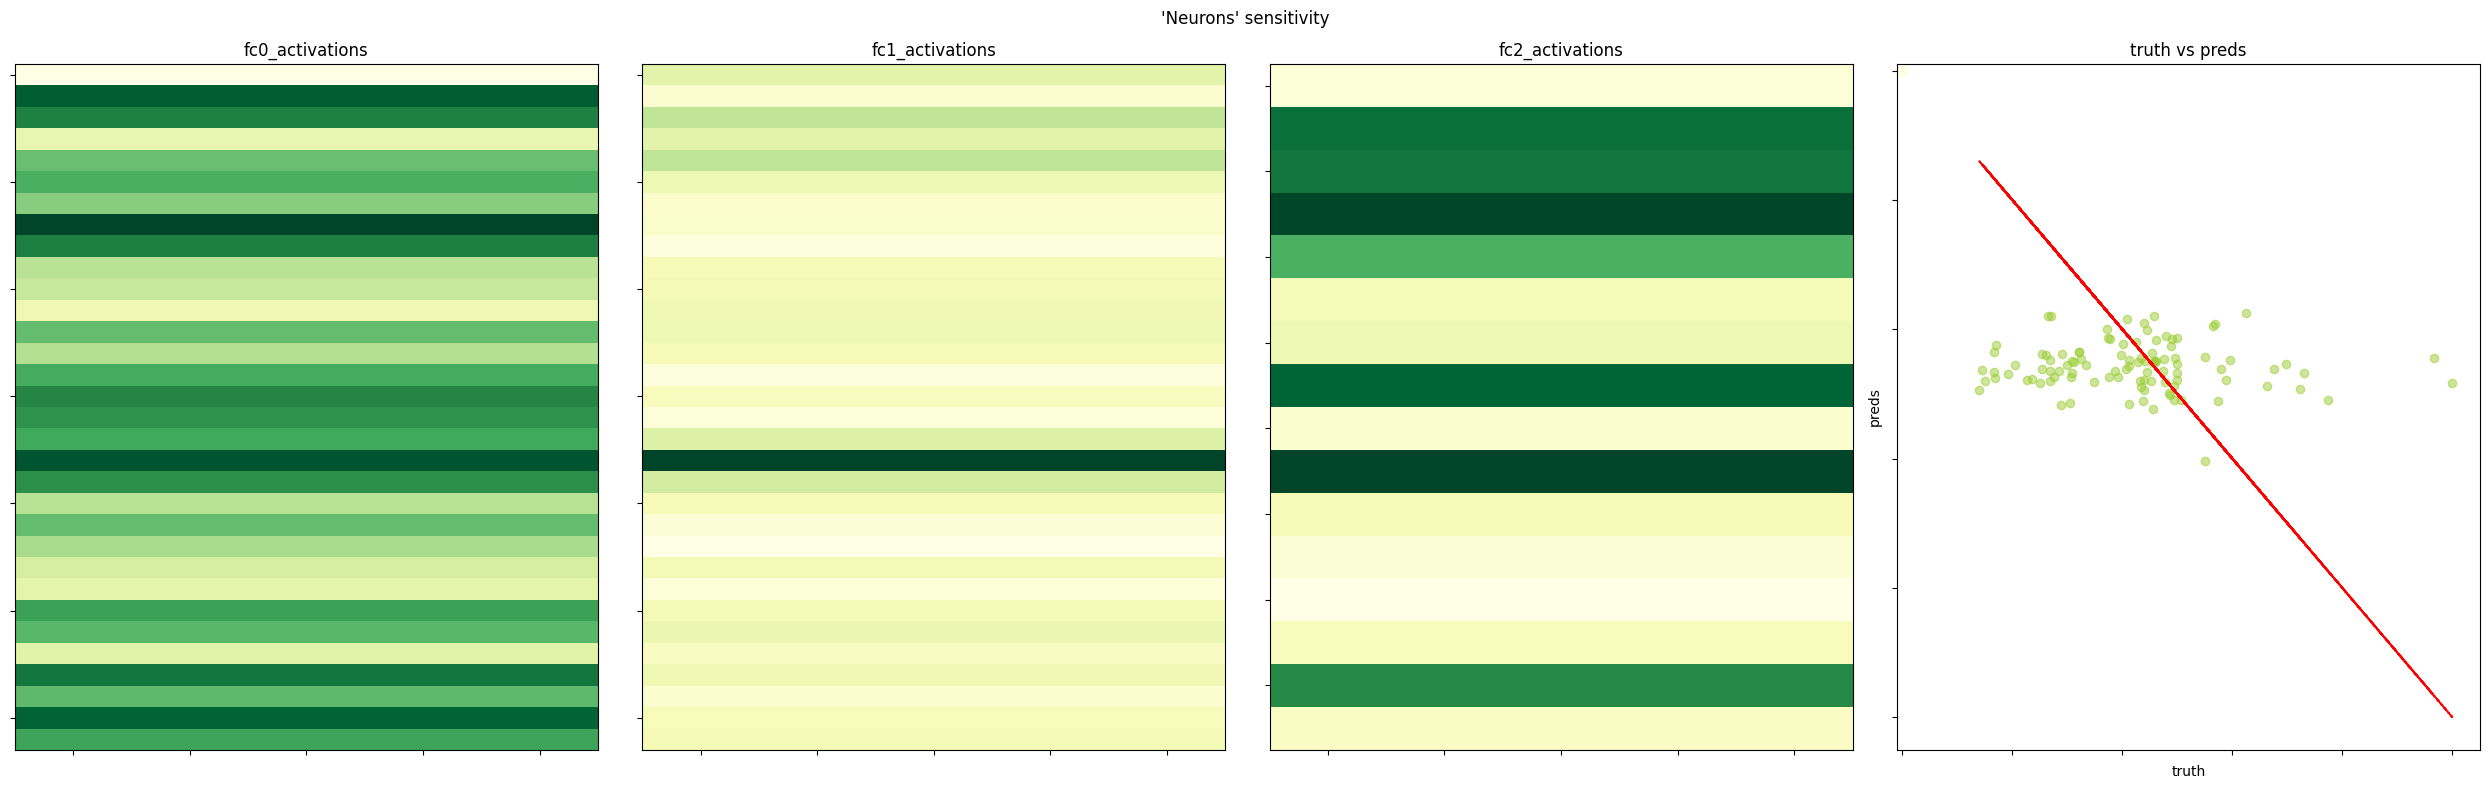

In [ ]:
model.plot_activations(
    X=torch.tensor(X_test_transformed, dtype=torch.float32),
    y=torch.tensor(y_test.values, dtype=torch.float32),
    agg_func=torch.std,
    fig_title="'Neurons' sensitivity",
)

/Users/soufiane/Desktop/perso/tabularpytorchers/src/tabularpytorchers/viz.py:62: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/Users/soufiane/Desktop/perso/tabularpytorchers/src/tabularpytorchers/viz.py:62: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


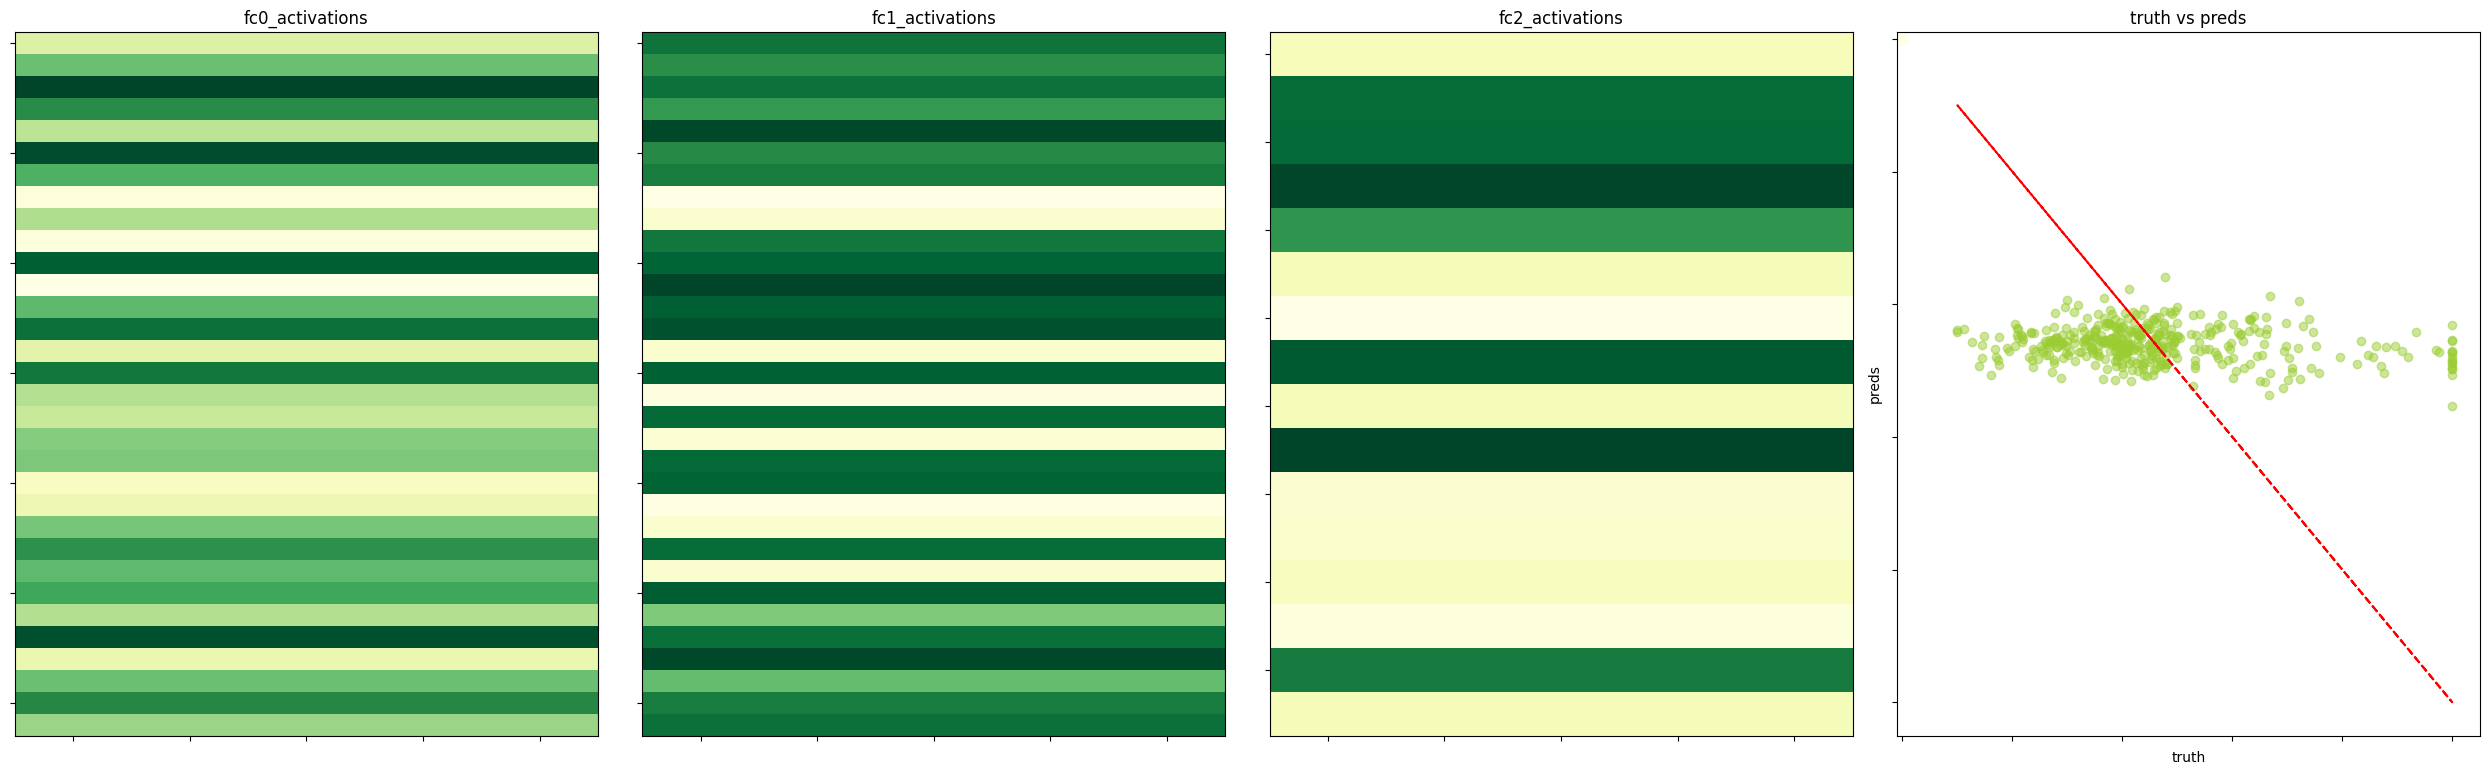

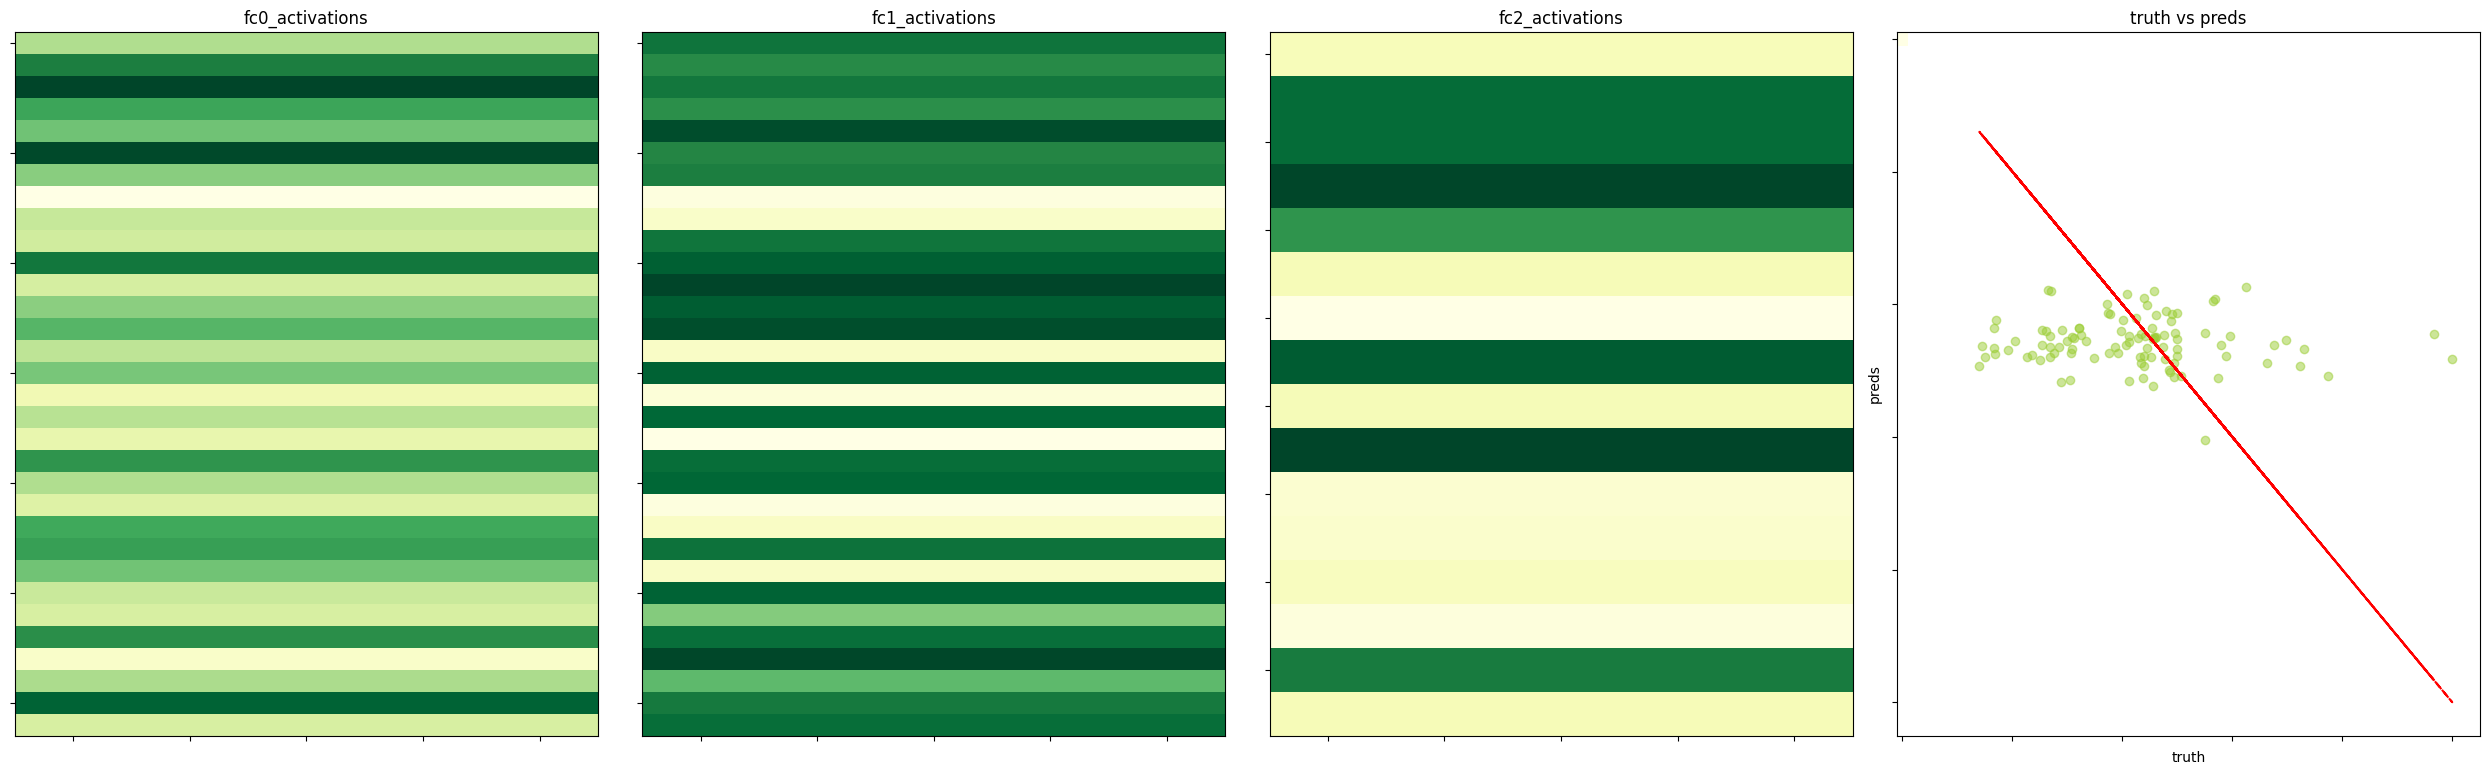

In [ ]:
X_train_transformed_tn = torch.tensor(X_train_transformed, dtype=torch.float32)
y_train_tn = torch.tensor(y_train, dtype=torch.float32)
X_val_transformed_tn = torch.tensor(X_test_transformed, dtype=torch.float32)
y_val_tn = torch.tensor(y_test.values, dtype=torch.float32)

model.plot_compared_activations(
    (X_train_transformed_tn, y_train_tn),
    (X_val_transformed_tn, y_val_tn),
)